In [1]:
### Import preprocessing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

### Import libraries for neural models
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.keras.__version__
import tensorflow as tf

In [2]:
# Load Neural Net Model for predictions
from tensorflow.keras.models import load_model

model = load_model("PulsarStar_NN_Model.h5")

In [3]:
# Read in Original DataSet to Analyze for New Mock DataFrame
starOrignialDF= pd.read_csv('pulsarStarData.csv', encoding = 'utf8')
starOrignialDF.dropna()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [4]:
#Pull Orignal data stats
statisticsDF= starOrignialDF.describe()
statisticsDF

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [5]:
# Clean Stats DataFrame: Remove Column (target_class) and Row (count and std). Cleaned DataFrame is ready to model predict.
statisticsDF1 = statisticsDF.drop(['target_class'], axis = 1)
statisticsDF_cleaned = statisticsDF1.drop([statisticsDF.index[0] , statisticsDF1.index[2]])
statisticsDF_cleaned

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [6]:
# Predict Pulsar Star Outcomes on Stats DataFrame
predict = model.predict_classes(statisticsDF_cleaned[:6])
print(predict)

[1 0 0 1 1 1]


In [7]:
statisticsDF_cleaned['Pulsar Predictions']=predict
statisticsDF_cleaned

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Pulsar Predictions
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,1
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,1
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,1
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1


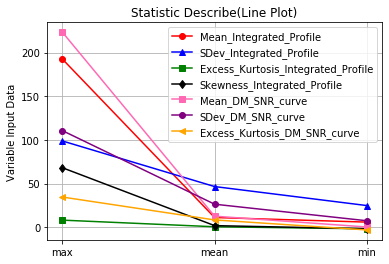

In [8]:
# Generate the Plot 

Statistic = [ 'max','mean','min']
Mean_Integrated_Profile = [192.617188,11.079968, 5.8125]
SDev_Integrated_Profile= [98.778911, 46.549532,24.772042]
Excess_Kurtosis_Integrated_Profile = [8.069522,0.477857, -1.876011]
Skewness_Integrated_Profile= [68.101622,1.770279,-1.791886]
Mean_DM_SNR_curve= [223.392140,12.614400,0.213211]
SDev_DM_SNR_curve=[110.642211,26.326515,7.370432]
Excess_Kurtosis_DM_SNR_curve= [34.539844,8.303556,-3.139270]

# Took off Skewness_DM_SNR_curve the max feature was an outlier for the chart
# Skewness_DM_SNR_curve=[1191.000837,104.857709,-1.976976]

fig = plt.figure()


plt.plot(Statistic,Mean_Integrated_Profile, marker = "o", color= "red", label="Mean_Integrated_Profile ")
plt.plot(Statistic, SDev_Integrated_Profile,marker= "^",color="blue", label= "SDev_Integrated_Profile")
plt.plot(Statistic,Excess_Kurtosis_Integrated_Profile,marker= "s",color="green", label= "Excess_Kurtosis_Integrated_Profile")
plt.plot(Statistic, Skewness_Integrated_Profile,marker= "d",color="black", label= "Skewness_Integrated_Profile")
plt.plot(Statistic, Mean_DM_SNR_curve,marker= "s",color="hotpink", label= "Mean_DM_SNR_curve")
plt.plot(Statistic, SDev_DM_SNR_curve,marker= "o",color="purple", label= "SDev_DM_SNR_curve")
plt.plot(Statistic,Excess_Kurtosis_DM_SNR_curve,marker= "<",color="orange", label= "Excess_Kurtosis_DM_SNR_curve")
# ax2.plot(Statistic, Skewness_DM_SNR_curve,marker= ">",color="yellow", label= "Skewness_DM_SNR_curve")

plt.legend(loc="best")
plt.title("Statistic Describe(Line Plot)")

plt.ylabel("Variable Input Data")
plt.grid()

plt.show()

In [9]:
# Check all classifier variables : Max / Min params to help create mock data
var_max = starOrignialDF[:].max()
var_min = starOrignialDF[:].min()

print(f"variable_max: {var_max}")
print(f"variable_min: {var_min}")

variable_max: Mean of the integrated profile                    192.617188
 Standard deviation of the integrated profile      98.778911
 Excess kurtosis of the integrated profile          8.069522
 Skewness of the integrated profile                68.101622
 Mean of the DM-SNR curve                         223.392140
 Standard deviation of the DM-SNR curve           110.642211
 Excess kurtosis of the DM-SNR curve               34.539844
 Skewness of the DM-SNR curve                    1191.000837
target_class                                        1.000000
dtype: float64
variable_min: Mean of the integrated profile                    5.812500
 Standard deviation of the integrated profile    24.772042
 Excess kurtosis of the integrated profile       -1.876011
 Skewness of the integrated profile              -1.791886
 Mean of the DM-SNR curve                         0.213211
 Standard deviation of the DM-SNR curve           7.370432
 Excess kurtosis of the DM-SNR curve             -3.13

In [10]:
# intialize data of lists. 
data = {" Mean of the integrated profile"               :[120.4536,87.3673, 10.4849],
        "Standard deviation of the integrated profile"  : [38.7911,66.2132, 94.4532],
        "Excess kurtosis of the integrated profile"     : [ 4.0692, 1.4377, -1.0111],
        "Skewness of the integrated profile"            : [ 8.1622,-0.7279,5.7916],
        "Mean of the DM-SNR curve"                      : [113.3940,121.4400,0.213211],
        "Standard deviation of the DM-SNR curve"        : [16.4251,16.3515, 94.3432],
        "Excess kurtosis of the DM-SNR curve"           :  [4.5344,-1.3754,23.1270],
        "Skewness of the DM-SNR curve"                  :[101.3727,4.0574, -0.2176],
        } 
 
# Create DataFrame 
print('               Mock DF')
print('           __________________________')

mockDF= pd.DataFrame.from_dict(data) 
mockDF

               Mock DF
           __________________________


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,120.4536,38.7911,4.0692,8.1622,113.394000,16.4251,4.5344,101.3727
1,87.3673,66.2132,1.4377,-0.7279,121.440000,16.3515,-1.3754,4.0574
2,10.4849,94.4532,-1.0111,5.7916,0.213211,94.3432,23.1270,-0.2176


In [11]:
# Adding rows to DataFrame
mockDF.loc[3]= [111.765625,52.943585,0.671724,0.383594,149.843646,97.926948,-0.696153,-1.260403]
mockDF.loc[4]= [99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680]
mockDF.loc[5]= [10.367188,81.572202,-1.547197,5.154106,0.555184,91.719016,21.208808,-0.662680]
mockDF.loc[6]= [29.27458,71.397202,1.21317,3.18676,1.54584,61.34536,24.476758,0.44480]
mockDF.loc[7]= [109.347588,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680]
mockDF.loc[8]= [51.3388,33.393702,8.55857,4.1106,27.47484,53.45366,1.4658,93.29701]
mockDF.loc[9]= [76.35768,21.94742,0.53831,45.154106,16.55454,71.713816,-2.25768,13.24350]

mockDF

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,120.453600,38.791100,4.069200,8.162200,113.394000,16.425100,4.534400,101.372700
1,87.367300,66.213200,1.437700,-0.727900,121.440000,16.351500,-1.375400,4.057400
2,10.484900,94.453200,-1.011100,5.791600,0.213211,94.343200,23.127000,-0.217600
3,111.765625,52.943585,0.671724,0.383594,149.843646,97.926948,-0.696153,-1.260403
4,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680
5,10.367188,81.572202,-1.547197,5.154106,0.555184,91.719016,21.208808,-0.662680
6,29.274580,71.397202,1.213170,3.186760,1.545840,61.345360,24.476758,0.444800
7,109.347588,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680
8,51.338800,33.393702,8.558570,4.110600,27.474840,53.453660,1.465800,93.297010
9,76.357680,21.947420,0.538310,45.154106,16.554540,71.713816,-2.257680,13.243500


In [12]:
# Predict Pulsar Star Outcomes
mock_predictions = model.predict_classes(mockDF[:])
print(mock_predictions)

[0 0 1 0 0 1 1 0 1 1]


In [13]:
# Add Prediction Column
mockDF["Pulsar Predictions"]=mock_predictions

#Final Prediction DataFrame
mockDF

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Pulsar Predictions
0,120.453600,38.791100,4.069200,8.162200,113.394000,16.425100,4.534400,101.372700,0
1,87.367300,66.213200,1.437700,-0.727900,121.440000,16.351500,-1.375400,4.057400,0
2,10.484900,94.453200,-1.011100,5.791600,0.213211,94.343200,23.127000,-0.217600,1
3,111.765625,52.943585,0.671724,0.383594,149.843646,97.926948,-0.696153,-1.260403,0
4,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,0
5,10.367188,81.572202,-1.547197,5.154106,0.555184,91.719016,21.208808,-0.662680,1
6,29.274580,71.397202,1.213170,3.186760,1.545840,61.345360,24.476758,0.444800,1
7,109.347588,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,0
8,51.338800,33.393702,8.558570,4.110600,27.474840,53.453660,1.465800,93.297010,1
9,76.357680,21.947420,0.538310,45.154106,16.554540,71.713816,-2.257680,13.243500,1


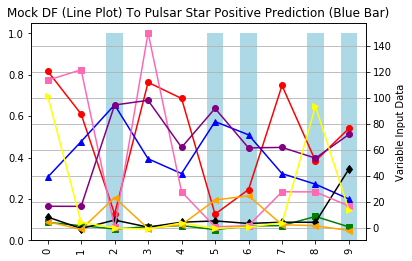

In [16]:
# Generate the Plot 

Statistic = [0,1,2,3,4,5,6,7,8,9]
Mean_Integrated_Profile = [120.4536,87.3673, 10.4849,111.765625,99.367188,10.367188,29.274580,109.347588,51.338800,76.357680]
SDev_Integrated_Profile= mockDF['Standard deviation of the integrated profile']
Excess_Kurtosis_Integrated_Profile = mockDF['Excess kurtosis of the integrated profile']
Skewness_Integrated_Profile= mockDF['Skewness of the integrated profile']
Mean_DM_SNR_curve= mockDF['Mean of the DM-SNR curve']
SDev_DM_SNR_curve= mockDF['Standard deviation of the DM-SNR curve']
Excess_Kurtosis_DM_SNR_curve= mockDF ['Excess kurtosis of the DM-SNR curve']
Skewness_DM_SNR_curve= mockDF['Skewness of the DM-SNR curve']

fig = plt.figure()
ax = mockDF["Pulsar Predictions"].plot(kind='bar',color= "lightblue", use_index=True)
ax2 = ax.twinx()
ax2.plot(Statistic,Mean_Integrated_Profile, marker = "o", color= "red", label="Mean_Integrated_Profile ")
ax2.plot(Statistic, SDev_Integrated_Profile,marker= "^",color="blue", label= "SDev_Integrated_Profile")
ax2.plot(Statistic,Excess_Kurtosis_Integrated_Profile,marker= "s",color="green", label= "Excess_Kurtosis_Integrated_Profile")
ax2.plot(Statistic, Skewness_Integrated_Profile,marker= "d",color="black", label= "Skewness_Integrated_Profile")
ax2.plot(Statistic, Mean_DM_SNR_curve,marker= "s",color="hotpink", label= "Mean_DM_SNR_curve")
ax2.plot(Statistic, SDev_DM_SNR_curve,marker= "o",color="purple", label= "SDev_DM_SNR_curve")
ax2.plot(Statistic,Excess_Kurtosis_DM_SNR_curve,marker= "<",color="orange", label= "Excess_Kurtosis_DM_SNR_curve")
plt.plot(Statistic, Skewness_DM_SNR_curve,marker= ">",color="yellow", label= "Skewness_DM_SNR_curve")


plt.title("Mock DF (Line Plot) To Pulsar Star Positive Prediction (Blue Bar)")
plt.xlabel("OBS#")
plt.ylabel("Variable Input Data")
plt.grid()
plt.xticks(rotation=90)
plt.show()